<h1>Twitt-Detector-Celebrities</h1>

Importação das bibliotecas princiapais

In [1]:
import pandas as pd
import numpy as np
#from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin

Carregando arquivos com as mensagens

In [2]:
messages_data = pd.read_csv("twitts/message.csv",encoding='utf-8')
print "Dados carregados com sucesso!"
print(messages_data[:10])

Dados carregados com sucesso!
                                            Mensagem  \
0  Four years ago  @MichelleObama and I had the p...   
1  I got my start holding community meetings in C...   
2  Young people have helped lead all our great mo...   
3  Billy Graham was a humble servant who prayed f...   
4  We are grieving with Parkland. But we are not ...   
5  Happy Valentine’s Day  @MichelleObama. You mak...   
6  RT @MichelleObama: Happy #ValentinesDay to my ...   
7  Dr. King was 26 when the Montgomery bus boycot...   
8  All across America people chose to get involve...   
9  Ten-year-old Jahkil Jackson is on a mission to...   

                             date author  
0  Mon Mar 12 18:12:41 +0000 2018  Obama  
1  Wed Feb 28 02:58:41 +0000 2018  Obama  
2  Thu Feb 22 16:00:44 +0000 2018  Obama  
3  Wed Feb 21 16:33:04 +0000 2018  Obama  
4  Thu Feb 15 17:12:17 +0000 2018  Obama  
5  Wed Feb 14 16:25:03 +0000 2018  Obama  
6  Wed Feb 14 16:24:22 +0000 2018  Obama  
7  Mon Ja

Contaegem basica de item por autor

In [3]:
from __future__ import division
print('Musk')
print(sum(messages_data['author'] == 'Musk'))
print('Obama')
print(sum(messages_data['author'] == 'Obama'))
print('Trump')
print(sum(messages_data['author'] == 'Trump'))
print('Gates')
print(sum(messages_data['author'] == 'Gates'))

Musk
200
Obama
200
Trump
200
Gates
200


Parser manual do campo de data retornado pelo twitter

In [4]:
import datetime as dt
from time import strptime


Obama_dates_in_string =[]
Trump_dates_in_string =[]
Musk_dates_in_string =[]
Gates_dates_in_string =[]
dates = messages_data['date']
i = 0
for m in dates:
    #print(m)
    month = strptime(m[4:7],'%b').tm_mon
    day =  m[8:10]
    year = m[26:30]
    aut = messages_data['author'][i]
    if(aut == 'Obama'):
        Obama_dates_in_string.append(dt.datetime.strptime(day+str(month)+year, "%d%m%Y").date())
    if(aut == 'Trump'):
        Trump_dates_in_string.append(dt.datetime.strptime(day+str(month)+year, "%d%m%Y").date())
    if(aut == 'Musk'):
        Musk_dates_in_string.append(dt.datetime.strptime(day+str(month)+year, "%d%m%Y").date())
    if(aut == 'Gates'):
        Gates_dates_in_string.append(dt.datetime.strptime(day+str(month)+year, "%d%m%Y").date())
    i = i + 1
    #print(aut)

TumpinDays = max(Trump_dates_in_string) - min(Trump_dates_in_string)
print('Trump:' + str(TumpinDays))
MuskinDays = max(Musk_dates_in_string) - min(Musk_dates_in_string)
print('Musk:' + str(MuskinDays))
GatesinDays = max(Gates_dates_in_string) - min(Gates_dates_in_string)
print('Gates:' + str(GatesinDays))
ObamainDays = max(Obama_dates_in_string) - min(Obama_dates_in_string)
print('Obama:' + str(ObamainDays))

Trump:30 days, 0:00:00
Musk:66 days, 0:00:00
Gates:249 days, 0:00:00
Obama:531 days, 0:00:00


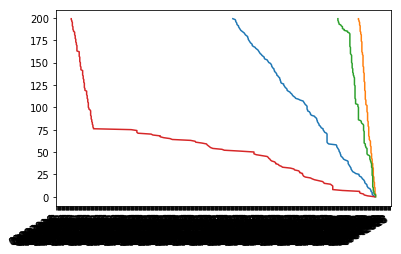

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d%m%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(Gates_dates_in_string,range(len(Gates_dates_in_string)))
plt.plot(Trump_dates_in_string,range(len(Trump_dates_in_string)))
plt.plot(Musk_dates_in_string,range(len(Musk_dates_in_string)))
plt.plot(Obama_dates_in_string,range(len(Obama_dates_in_string)))
plt.gcf().autofmt_xdate()
plt.show()

Classe de matriz de confusão e stopwords (ntkl)

In [6]:
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords # Import the stop word list
nltk.download('stopwords')

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

# import words to set with stop
words_to_stop = open("stops_words.txt", "r").read().replace("\n",",").split(",")

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="orange" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

def review_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review, "lxml").get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))
    
    # add words in list to set with stop
    stops.update((words_to_stop))
    
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))   

clean_review = review_to_words( "Just @ test to see the review" )
print clean_review

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bruno.santos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
test see review


Separação massa de teste e treino e Atribuição de mensagens no stopwords

In [7]:
from sklearn.cross_validation import train_test_split  

author = messages_data['author']
message = messages_data['Mensagem']
MensagemArray = []
i = 0
for m in message:
    #remove URL from messages
    m = re.sub(r"http\S+", "", m)
    #MensagemArray.append([review_to_words(m),spam_id[i] ])
    MensagemArray.append(review_to_words(m))
    i = i + 1

features = messages_data.drop(['Mensagem','date'], axis = 1)
#print(MensagemArray.shape)
# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(MensagemArray, features ,test_size = 0.15, random_state=40)

X_train10, X_test10, y_train10, y_test10 = train_test_split(MensagemArray, features ,test_size = 0.10, random_state=42)
X_train20, X_test20, y_train20, y_test20 = train_test_split(MensagemArray, features ,test_size = 0.20, random_state=31)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Inclusão biblioteca de wordcloud e aplicação da mesma

In [ ]:
from subprocess import check_output
import matplotlib as mpl
from wordcloud import WordCloud

#mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 
    
wordcloud = WordCloud().generate(str(MensagemArray))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [ ]:
print features.shape

Treino utilizando pipes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn import svm

pipe_LogisticRegression = make_pipeline(StandardScaler(), LogisticRegression())
pipe_NaiveBayes = make_pipeline(StandardScaler(),GaussianNB())
pipe_NearestCentroid = make_pipeline(StandardScaler(),NearestCentroid(metric='euclidean', shrink_threshold=None))
pipe_SVM = make_pipeline(StandardScaler(),svm.LinearSVC())

Fit em todos os pipes e vetorização da massa

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn import datasets, linear_model

vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.2)
data_train_transformed = vectorizer.fit_transform(X_train)
data_test_transformed  = vectorizer.transform(X_test)
data_test_transformed10  = vectorizer.transform(X_test10)
data_test_transformed20  = vectorizer.transform(X_test20)

selector = SelectPercentile(f_classif, percentile=5)
selector.fit(data_train_transformed, y_train)
data_train_transformed = selector.transform(data_train_transformed).toarray()
data_test_transformed  = selector.transform(data_test_transformed).toarray()
print(data_test_transformed[0])
print(X_test[0])
data_test_transformed10  = selector.transform(data_test_transformed10).toarray()
data_test_transformed20  = selector.transform(data_test_transformed20).toarray()

pipe_LogisticRegression.fit(data_train_transformed, y_train)
pipe_NaiveBayes.fit(data_train_transformed, y_train)
pipe_NearestCentroid.fit(data_train_transformed, y_train)
pipe_SVM.fit(data_train_transformed, y_train)

Predições e matriz de confusão

In [ ]:
predictions =pipe_LogisticRegression.predict(data_test_transformed)
predictions10 =pipe_LogisticRegression.predict(data_test_transformed10)
predictions20 =pipe_LogisticRegression.predict(data_test_transformed20)
SVMLogisticRegression = accuracy_score(y_test, predictions)
SVMLogisticRegression10 = accuracy_score(y_test10, predictions10)
SVMLogisticRegression20 = accuracy_score(y_test20, predictions20)
predito_treino = pipe_LogisticRegression.predict(data_test_transformed)# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['gates','musk','obama','trump'], normalize=True,  title='Confusion matrix Logistic Regression')
plt.show()

In [ ]:
predictions =pipe_NaiveBayes.predict(data_test_transformed)
predictions10 =pipe_NaiveBayes.predict(data_test_transformed10)
predictions20 =pipe_NaiveBayes.predict(data_test_transformed20)
SVMNaiveBayes = accuracy_score(y_test, predictions)
SVMNaiveBayes10 = accuracy_score(y_test10, predictions10)
SVMNaiveBayes20 = accuracy_score(y_test20, predictions20)
predito_treino = pipe_NaiveBayes.predict(data_test_transformed)# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['gates','musk','obama','trump'], normalize=True,  title='Confusion matrix Naive Bayes')
plt.show()

In [ ]:
predictions =pipe_NearestCentroid.predict(data_test_transformed)
predictions10 =pipe_NearestCentroid.predict(data_test_transformed10)
predictions20 =pipe_NearestCentroid.predict(data_test_transformed20)
SVMNearestCentroid = accuracy_score(y_test, predictions)
SVMNearestCentroid10 = accuracy_score(y_test10, predictions10)
SVMNearestCentroid20 = accuracy_score(y_test20, predictions20)
predito_treino = pipe_NearestCentroid.predict(data_test_transformed)# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['gates','musk','obama','trump'], normalize=True,  title='Confusion matrix Nearest Centroid')
plt.show()

In [ ]:
predictions =pipe_SVM.predict(data_test_transformed)
predictions10 =pipe_SVM.predict(data_test_transformed10)
predictions20 =pipe_SVM.predict(data_test_transformed20)
SVMScore = accuracy_score(y_test, predictions)
SVMScore10 = accuracy_score(y_test10, predictions10)
SVMScore20 = accuracy_score(y_test20, predictions20)
predito_treino = pipe_SVM.predict(data_test_transformed)# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['gates','musk','obama','trump'], normalize=True,  title='Confusion matrix SVM')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from numpy import median



versao = [1,2,3]
aLogisticRegression = [SVMLogisticRegression,SVMLogisticRegression10,SVMLogisticRegression20]
aNearestCentroid = [SVMNearestCentroid,SVMNearestCentroid10,SVMNearestCentroid20]
aNaiveBayes = [SVMNaiveBayes,SVMNaiveBayes10,SVMNaiveBayes20]
aSVM = [SVMScore,SVMScore10,SVMScore20]

print 'SVM ' + str(median(aSVM))
print 'LogisticRegression ' + str(median(aLogisticRegression))
print 'NearestCentroid ' + str(median(aNearestCentroid))
print 'NaiveBayes ' + str(median(aNaiveBayes))

plt.plot(versao, aNaiveBayes, color='g',label='NaiveBayes')
plt.plot(versao, aSVM, color='orange',label='SVM')
plt.plot(versao, aNearestCentroid, color='black',label='NearestCentroid')
plt.plot(versao, aLogisticRegression, color='blue',label='LogisticRegression')
plt.xlabel('Versao')
plt.ylabel('accuracy_score')
plt.title('Versoes dos pipes')
plt.legend()
plt.show()

<h2> Testes basicos </h2>

In [ ]:
#message = 'Who wants a tesla in a space 9 ship?'
message = 'my wife michelle recive young leaders to help then to build the future'
#message = 'We need to build an wall to keep mexicans off'
#message = 'Who wants to help to keep malaria off Africa?' 
message = 'Advances in agriculture can have a big impact on the lives of the world’s poorest. I’m particularly excited about new research from the @RIPEproject.'
message = 'Have fun out there among the stars.'
vectorize_message = vectorizer.transform([message])
vectorize_message = selector.transform(vectorize_message).toarray()
predict_proba = pipe_LogisticRegression.predict_proba(vectorize_message).tolist()
predict_proba[0][0] = ("%.4f" % predict_proba[0][0])
predict_proba[0][1] = ("%.4f" % predict_proba[0][1])
predict_proba[0][2] = ("%.4f" % predict_proba[0][2])
predict_proba[0][3] = ("%.4f" % predict_proba[0][3])
predict = pipe_LogisticRegression.predict(vectorize_message).tolist()
print(predict)
print(predict_proba)

Encapsulamento dos objetos no dill

In [ ]:
import dill
with open('dill/pipe_TwitterDetector.dill', 'wb') as file:
    dill.dump(pipe_LogisticRegression, file)
    
with open('dill/pipe_vectorizer_TwitterDetector.dill', 'wb') as file:
    dill.dump(vectorizer, file)
with open('dill/pipe_selector_TwitterDetector.dill', 'wb') as file:
    dill.dump(selector, file)

Para recuperar a predição é necessário executar apenas os codigos abaixo em um ambiente para rapida analise da mensagem

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib
from sklearn.base import BaseEstimator, TransformerMixin
import dill

import os
from flask import Flask, jsonify, request

Recuperação dos objetos via dill

In [ ]:
with open('dill/pipe_TwitterDetector.dill', 'rb') as f:
    twitt_clf = dill.load(f)
with open('dill/pipe_vectorizer_TwitterDetector.dill', 'rb') as f:
    spam_vectorizer = dill.load(f)   
with open('dill/pipe_selector_TwitterDetector.dill', 'rb') as f:
    spam_selector = dill.load(f)    


Testes basicos via objeto do dill

In [ ]:
message = 'I will send my space 9 to mars!'
vectorize_message = spam_vectorizer.transform([message])
vectorize_message = spam_selector.transform(vectorize_message).toarray()
predict_proba = twitt_clf.predict_proba(vectorize_message).tolist()
predict_proba[0][0] = ("%.4f" % predict_proba[0][0])
predict_proba[0][1] = ("%.4f" % predict_proba[0][1])
predict_proba[0][2] = ("%.4f" % predict_proba[0][2])
predict_proba[0][3] = ("%.4f" % predict_proba[0][3])
predict = twitt_clf.predict(vectorize_message).tolist()
print(predict)
print(predict_proba)

Instancia online de consulta de API HTTP POST utilizando Flask

In [ ]:
app = Flask(__name__)
@app.route('/twitter_detector', methods=['POST'])
def spam():
    json_ = request.json   
    message = json_['message']
    vectorize_message = spam_vectorizer.transform([message])
    vectorize_message = spam_selector.transform(vectorize_message).toarray()
    predict_proba = spam_clf.predict_proba(vectorize_message).tolist()
    predict_proba[0][0] = ("%.4f" % predict_proba[0][0])
    predict_proba[0][1] = ("%.4f" % predict_proba[0][1])
    predict_proba[0][2] = ("%.4f" % predict_proba[0][2])
    predict_proba[0][3] = ("%.4f" % predict_proba[0][3])
    predict = twitt_clf.predict(vectorize_message).tolist()
    responses = jsonify({'predict':predict,'predict_proba':predict_proba})
    responses.status_code = 200
    return (responses)

if __name__ == '__main__':
    app.run(port=8080)